# **Modelo predictivo de satisfacción en proyecto solidario**

Ángel Azahel Ramírez Cabello - A01383328

Annete Pamela Ruiz Abreu - A01423595

Luis Angel López Chávez - A01571000

Jorge Raúl Rocha López - A01740816

Franco Mendoza Muraira - A01383399

Datasets: https://drive.google.com/file/d/1pP523QcG0W4gHYq1NbNTZWVjW3xRdHwC/view?usp=sharing

# Etapa 2: Comprensión y Preparación de los datos

In [2]:
# !pip install geopandas

In [3]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import geopandas as gpd

In [4]:
# Lectura de archivos
d1 = pd.read_excel("Datos/Encuesta+a+Estudiantes+PS_17+de+mayo+de+2023_12.05.xlsx", header=1)
d2 = pd.read_excel("Datos/Estudiantes+PS_INV23+TEC21_17+de+mayo+de+2023_12.22.xlsx", header=1)
d3 = pd.read_excel("Datos/Estudiantes+PS+AD22+TEC21_17+de+mayo+de+2023_12.07.xlsx", header=1)
d4 = pd.read_excel("Datos/Estudiantes+PS+FJ22+TEC21_17+de+mayo+de+2023_12.17.xlsx", header=1)
d5 = pd.read_excel("Datos/Estudiantes+PS+FJ23_17+de+mayo+de+2023_12.28.xlsx", header=1)

## Unión de datos

In [5]:
# Unir datos
raw_data = pd.concat([d1,d2,d3,d4,d5], ignore_index = True)

# Comprobación de la unión
print(len(d1)+len(d2)+len(d3)+len(d4)+len(d5)==len(raw_data))


True


In [6]:
raw_data.columns

Index(['Fecha de inicio', 'Fecha final', 'Tipo de respuesta', 'Dirección IP',
       'Progreso', 'Duración (en segundos)', 'Finalizado', 'Fecha registrada',
       'ID de respuesta', 'Apellido del destinatario', 'ID',
       'Datos de referencia externos', 'Latitud de ubicación',
       'Longitud de ubicación', 'Canal de la distribución',
       'Idioma del usuario',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables',
       '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto',
       '1. Evalúa tu nivel satisfa

## Reformato de Datos

In [7]:
new_columns = ["Fecha de inicio", "Fecha final", "Tipo respuesta",
               "IP", "Progreso", "Duración", "Finalizado", "Fecha registrada",
               "ID respuesta", "Apellido", "ID", "Datos referencia externos", 
               "Latitud", "Longitud", "Canal de distribución", "Idioma",
               "P1.1", "P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P1.8", "P2", "P3",
               "Comentario para OSF", "P5.1", "P5.2", "P5.3", "P5.4",
               "Comentario general", "Tipo comentario", "OSF", "CRN", 
               "Nombre destinatario", "Correo", "OSF y nombre proyecto", "Nombre experiencia", 
               "Periodo", "Formato", "Matrícula", "Semana"]

rename_columns = {old : new for old, new in zip(raw_data.columns, new_columns)}

raw_data = raw_data.rename(columns = rename_columns) 

raw_data

,Fecha de inicio,Fecha final,Tipo respuesta,IP,Progreso,Duración,Finalizado,Fecha registrada,ID respuesta,Apellido,...,OSF,CRN,Nombre destinatario,Correo,OSF y nombre proyecto,Nombre experiencia,Periodo,Formato,Matrícula,Semana
0,2021-04-22 13:24:25,2021-04-22 13:26:37,Survey Preview,NaN,100,132,True,2021-04-22 13:26:38.693,R_12tdDn1LDz4BmzD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:09,2021-04-22 17:38:36,IP Address,187.153.66.173,100,207,True,2021-04-22 17:38:37.820,R_3nBhoMQcs4l6UzN,NaN,...,León Ortigosa ABP,26892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-22 18:31:39,2021-04-22 18:34:28,IP Address,187.189.141.187,100,168,True,2021-04-22 18:34:29.065,R_3CT33YuqT2viJVr,NaN,...,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-23 04:47:59,2021-04-23 04:53:49,IP Address,45.238.188.41,100,349,True,2021-04-23 04:53:50.721,R_2Vr6CJ6upwFerdf,NaN,...,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-23 07:45:14,2021-04-23 07:49:20,IP Address,189.152.158.35,100,245,True,2021-04-23 07:49:20.607,R_cTjIZnPkeIWYVUZ,NaN,...,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,2023-05-05 19:27:32,2023-05-05 19:33:53,IP Address,201.172.224.145,100,380,True,2023-05-05 19:33:54.699,R_3NXxtUgVCKhsVbN,NaN,...,NaN,NaN,NaN,NaN,"Tierra de Artistas, A.C.",NaN,NaN,NaN,NaN,NaN
10495,2023-05-05 20:30:55,2023-05-05 20:40:27,IP Address,189.219.40.197,100,572,True,2023-05-05 20:40:29.092,R_3KxON95fcLNEP97,NaN,...,NaN,NaN,NaN,NaN,Community First (Campus Cumbres),NaN,NaN,NaN,NaN,NaN
10496,2023-05-08 13:58:27,2023-05-08 14:03:32,IP Address,189.219.41.21,100,305,True,2023-05-08 14:03:34.453,R_24CYlJq6Rm409Z1,NaN,...,NaN,NaN,NaN,NaN,Secretaría de Educación de Nuevo León: Coordin...,NaN,NaN,NaN,NaN,NaN
10497,2023-05-08 18:35:40,2023-05-08 18:38:06,IP Address,189.159.96.60,100,145,True,2023-05-08 18:38:07.220,R_1eJN81eTg5dEtfc,NaN,...,NaN,NaN,NaN,NaN,FUERZA Y ESPERANZA POR UNO MÁS,NaN,NaN,NaN,NaN,NaN


In [8]:
to_numbers = {"\n5 Totalmente de Acuerdo": 5,
              "\n5 Muy Satisfecho": 5,
              " 4": 4,
              " 3": 3,
              " 2": 2,
              "\n1 Nada Satisfecho": 1,
              "\n1 Nada de Acuerdo": 1}

for col in raw_data.columns:
    raw_data[col] = raw_data[col].replace(to_numbers)

raw_data.dtypes

Fecha de inicio              datetime64[ns]
Fecha final                  datetime64[ns]
Tipo respuesta                       object
IP                                   object
Progreso                              int64
Duración                              int64
Finalizado                             bool
Fecha registrada             datetime64[ns]
ID respuesta                         object
Apellido                             object
ID                                   object
Datos referencia externos           float64
Latitud                             float64
Longitud                            float64
Canal de distribución                object
Idioma                               object
P1.1                                float64
P1.2                                float64
P1.3                                float64
P1.4                                float64
P1.5                                float64
P1.6                                float64
P1.7                            

##  Visualización de Datos

### Variables Cuantitativas

In [9]:
# !pip install geopandas
import geopandas as gpd


<!-- La columna OSF se refiere a un identificador de la Organización Socio-Formador por lo que se considera una variable categórica -->

Las siguientes columnas son _completamente nulas_ :

- **Datos referencia externos**
- **Nombre destinatario**
- **Correo**

Las columnas de preguntas: P2, P3 son respuestas de Sí y No, por lo que son variables categóricas 

In [10]:
cols_nulos = [col for col in raw_data.columns if raw_data[col].isna().sum() == raw_data.shape[0]]
cols_nulos

['Datos referencia externos', 'Nombre destinatario', 'Correo']

In [11]:
numericVariables = raw_data.select_dtypes(["int64", "float64"]).drop(cols_nulos, axis = 1)
print(numericVariables.columns)
numericVariables

Index(['Progreso', 'Duración', 'Latitud', 'Longitud', 'P1.1', 'P1.2', 'P1.3',
       'P1.4', 'P1.5', 'P1.6', 'P1.7', 'P1.8', 'P5.1', 'P5.2', 'P5.3', 'P5.4',
       'CRN', 'Periodo'],
      dtype='object')


,Progreso,Duración,Latitud,Longitud,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4,CRN,Periodo
0,100,132,25.644897,-100.310997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,207,22.333099,-97.884300,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,26892.0,NaN
2,100,168,25.747894,-100.284401,4.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,26918.0,NaN
3,100,349,20.815598,-102.766998,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,26913.0,NaN
4,100,245,25.682205,-100.262199,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,26933.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,100,380,25.655400,-100.325800,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
10495,100,572,25.654600,-100.296700,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
10496,100,305,25.654600,-100.296700,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN
10497,100,145,25.654400,-100.405600,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN


In [12]:
col_cat = [col for col in raw_data.columns if col not in numericVariables]
col_cat

['Fecha de inicio',
 'Fecha final',
 'Tipo respuesta',
 'IP',
 'Finalizado',
 'Fecha registrada',
 'ID respuesta',
 'Apellido',
 'ID',
 'Datos referencia externos',
 'Canal de distribución',
 'Idioma',
 'P2',
 'P3',
 'Comentario para OSF',
 'Comentario general',
 'Tipo comentario',
 'OSF',
 'Nombre destinatario',
 'Correo',
 'OSF y nombre proyecto',
 'Nombre experiencia',
 'Formato',
 'Matrícula',
 'Semana']

In [13]:
progresoValues = pd.DataFrame(numericVariables["Progreso"].value_counts())
progresoValues

,Progreso
100,10495
88,4


Se encuentra que de los 10495 registros de encueestas, únicamente 4 no se contestaron completamente, llegando hasta 88% de completición

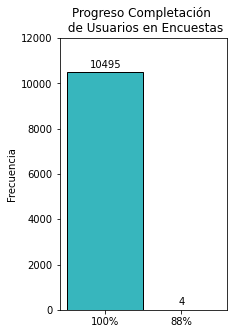

In [14]:
progresoValues = pd.DataFrame(numericVariables["Progreso"].value_counts())

fig = plt.figure(figsize = (3, 5))

barProgreso = plt.bar([0,0.5], progresoValues["Progreso"], color ='#37b6bd',
                      width = 0.5, align = "center", ec = "black")

plt.ylim([0,12000])
progresoLocs, progresoLabels = plt.xticks([0, 0.5], labels = progresoValues.index.astype(str) + "%")

for i, bar in enumerate(barProgreso):
    plt.text(x = bar.get_x() + bar.get_width() / 2.0, y = bar.get_height() + 200, s = f"{bar.get_height()}", ha = "center")

plt.title("Progreso Completación \n de Usuarios en Encuestas")
plt.ylabel("Frecuencia")

plt.show()

Cuartiles de variable de "Duración" en segundos

- 0%   : 25
- 25%  : 119
- 50%  : 190
- 75%  : 361
- 100% : 1298823

In [15]:
numericVariables['Duración'].quantile([0,0.25, 0.5, 0.75,1])

0.00         25.0
0.25        119.0
0.50        190.0
0.75        361.0
1.00    1298823.0
Name: Duración, dtype: float64

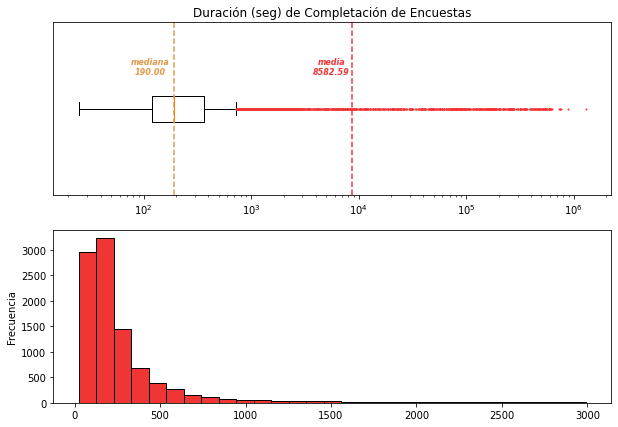

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,7))

filteredDuracion = numericVariables[numericVariables["Duración"] <= 3000]

results = ax1.boxplot(numericVariables["Duración"], vert = False,
                      flierprops={'marker': 'o', 
                                  'markersize': 1,
                                  'markerfacecolor' : '#f03535', 
                                  'markeredgecolor' : '#f03535'})

ax1.set_title("Duración (seg) de Completación de Encuestas")
ax1.set_xscale("log")
ax1.get_yaxis().set_visible(False)
ax1.axvline(numericVariables["Duración"].median(), color = "#e3994b", ls='--')
ax1.axvline(numericVariables["Duración"].mean(), color = "#f03535", ls='--')

ax1.text(x = numericVariables["Duración"].median() - 75, y = 1 + 0.20, 
         s = f"mediana\n{numericVariables['Duración'].median():.2f}", 
         ha = "center", fontsize = 8, fontstyle = "oblique", fontweight = "bold",
         color = "#e3994b")

ax1.text(x = numericVariables["Duración"].mean() - 3000, y = 1 + 0.20, 
         s = f"media\n{numericVariables['Duración'].mean():.2f}", 
         ha = "center", fontsize = 8, fontstyle = "oblique", fontweight = "bold",
         color = "#f03535") 

ax2.hist(filteredDuracion["Duración"],  
         bins = np.linspace(filteredDuracion["Duración"].min(),
                            filteredDuracion["Duración"].max(),
                            30),
         color = "#f03535",
         ec = "black")
ax2.set_ylabel("Frecuencia")

plt.show()

**¿Se quiere realizar un análisis para encontrar de cuales países provienen los resultados de la encuesta?**

In [17]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

C:\Users\angel\AppData\Local\Temp/ipykernel_7824/3095724689.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


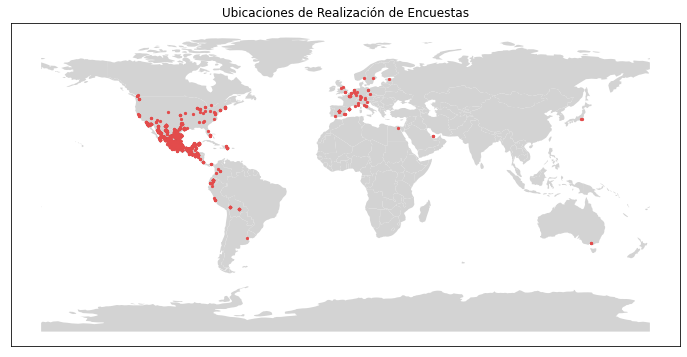

In [18]:
geometry = [Point(xy) for xy in zip(numericVariables['Longitud'], numericVariables['Latitud'])]
gdf = GeoDataFrame(numericVariables, geometry = geometry)

fig, axMap = plt.subplots(figsize=(12, 6))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax = axMap,color = 'lightgray', markersize = 5)

plt.scatter(numericVariables['Longitud'], numericVariables['Latitud'], color = '#e34b4b', s=5)

axMap.get_xaxis().set_visible(False)
axMap.get_yaxis().set_visible(False)

axMap.set_title("Ubicaciones de Realización de Encuestas")

plt.show()

In [19]:
import seaborn as sns

In [20]:
questions = numericVariables[['P1.1', 'P1.2', 'P1.3', 'P1.4', 'P1.5',
                              'P1.6', 'P1.7', 'P1.8', 'P5.1', 'P5.2', 
                              'P5.3', 'P5.4']]

questions.corr()

,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4
P1.1,1.000000,0.769652,0.707533,0.689604,0.514595,0.761451,0.721158,0.626563,0.464929,0.527476,0.482508,0.511512
P1.2,0.769652,1.000000,0.710194,0.658420,0.530129,0.692055,0.656294,0.610161,0.513366,0.574809,0.523962,0.555859
P1.3,0.707533,0.710194,1.000000,0.656092,0.501959,0.659959,0.639671,0.573503,0.464120,0.535832,0.485031,0.527644
P1.4,0.689604,0.658420,0.656092,1.000000,0.496143,0.696515,0.668409,0.573875,0.454455,0.498975,0.465372,0.472441
P1.5,0.514595,0.530129,0.501959,0.496143,1.000000,0.507758,0.497206,0.558853,0.387165,0.402761,0.373331,0.391169
P1.6,0.761451,0.692055,0.659959,0.696515,0.507758,1.000000,0.837625,0.662978,0.437274,0.502690,0.457573,0.492415
P1.7,0.721158,0.656294,0.639671,0.668409,0.497206,0.837625,1.000000,0.682255,0.424102,0.489432,0.443559,0.471943
P1.8,0.626563,0.610161,0.573503,0.573875,0.558853,0.662978,0.682255,1.000000,0.406643,0.461918,0.409183,0.439532
P5.1,0.464929,0.513366,0.464120,0.454455,0.387165,0.437274,0.424102,0.406643,1.000000,0.666425,0.638510,0.630717
P5.2,0.527476,0.574809,0.535832,0.498975,0.402761,0.502690,0.489432,0.461918,0.666425,1.000000,0.730925,0.741025


In [21]:
questions.describe().drop("count").round(2)

,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4
mean,4.53,4.59,4.56,4.49,4.30,4.49,4.47,4.46,4.6,4.72,4.72,4.71
std,0.74,0.70,0.72,0.84,0.95,0.84,0.87,0.84,0.7,0.57,0.58,0.59
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
25%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0,5.00,5.00,5.00
50%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00
75%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00,5.00


In [22]:
other = numericVariables[['Progreso', 'Duración', 'Latitud', 'Longitud']]
other.describe().round(2).rename({"Duración" : "Duración (en seg)"}, axis = True)

,Progreso,Duración (en seg),Latitud,Longitud
count,10499.00,10499.00,10495.00,10495.00
mean,100.00,8582.59,25.00,-99.21
std,0.23,52148.45,4.07,10.76
min,88.00,25.00,-37.83,-123.13
25%,100.00,119.00,25.64,-100.33
50%,100.00,190.00,25.65,-100.31
75%,100.00,361.00,25.68,-100.26
max,100.00,1298823.00,59.96,144.97


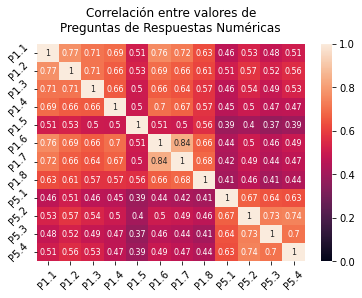

In [23]:
corr = sns.heatmap(questions.corr(), annot=True, vmin=0, vmax=1, annot_kws={"fontsize":8})
corr.set_title('Correlación entre valores de\nPreguntas de Respuestas Numéricas', fontdict={'fontsize':12}, pad=12);
corr.tick_params(axis='y', rotation=45)
corr.tick_params(axis='x', rotation=45)

In [24]:
numericVariables.columns

Index(['Progreso', 'Duración', 'Latitud', 'Longitud', 'P1.1', 'P1.2', 'P1.3',
       'P1.4', 'P1.5', 'P1.6', 'P1.7', 'P1.8', 'P5.1', 'P5.2', 'P5.3', 'P5.4',
       'CRN', 'Periodo'],
      dtype='object')

## Manejar valores nulos

In [25]:
raw_data.loc[questions.apply(lambda row: True if row.isna().sum() > 0 else False, axis = 1)]

,Fecha de inicio,Fecha final,Tipo respuesta,IP,Progreso,Duración,Finalizado,Fecha registrada,ID respuesta,Apellido,...,OSF,CRN,Nombre destinatario,Correo,OSF y nombre proyecto,Nombre experiencia,Periodo,Formato,Matrícula,Semana
0,2021-04-22 13:24:25,2021-04-22 13:26:37,Survey Preview,NaN,100,132,True,2021-04-22 13:26:38.693,R_12tdDn1LDz4BmzD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,2021-06-03 23:27:01,2021-06-03 23:27:30,Survey Preview,NaN,100,28,True,2021-06-03 23:27:31.144,R_1jTe0ddq06uaF2u,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
raw_data.isna().sum()

Fecha de inicio                  0
Fecha final                      0
Tipo respuesta                   0
IP                               3
Progreso                         0
Duración                         0
Finalizado                       0
Fecha registrada                 0
ID respuesta                     0
Apellido                      7283
ID                               0
Datos referencia externos    10499
Latitud                          4
Longitud                         4
Canal de distribución         1520
Idioma                           0
P1.1                             2
P1.2                             2
P1.3                             2
P1.4                             2
P1.5                             2
P1.6                             2
P1.7                             2
P1.8                             2
P2                               2
P3                               2
Comentario para OSF            161
P5.1                             2
P5.2                

## Comprensión

In [27]:
# Exploración
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha de inicio            10499 non-null  datetime64[ns]
 1   Fecha final                10499 non-null  datetime64[ns]
 2   Tipo respuesta             10499 non-null  object        
 3   IP                         10496 non-null  object        
 4   Progreso                   10499 non-null  int64         
 5   Duración                   10499 non-null  int64         
 6   Finalizado                 10499 non-null  bool          
 7   Fecha registrada           10499 non-null  datetime64[ns]
 8   ID respuesta               10499 non-null  object        
 9   Apellido                   3216 non-null   object        
 10  ID                         10499 non-null  object        
 11  Datos referencia externos  0 non-null      float64       
 12  Lati

# Reinicio de raw data


In [28]:
raw_data = pd.concat([d1,d2,d3,d4,d5])

In [29]:
# Estadística variables cuantitativas

cuantitativas = raw_data.drop(labels=["Datos de referencia externos", "Nombre del destinatario", "Correo electrónico del destinatario", "CRN", "Periodo"], axis=1)
cuantitativas.describe()


,Progreso,Duración (en segundos),Latitud de ubicación,Longitud de ubicación
count,10499.000000,1.049900e+04,10495.000000,10495.000000
mean,99.995428,8.582590e+03,24.995108,-99.212264
std,0.234194,5.214845e+04,4.066914,10.763758
min,88.000000,2.500000e+01,-37.828000,-123.133700
25%,100.000000,1.190000e+02,25.644897,-100.325800
50%,100.000000,1.900000e+02,25.654600,-100.311000
75%,100.000000,3.610000e+02,25.680200,-100.263100
max,100.000000,1.298823e+06,59.955000,144.966900


In [30]:
# Moda de variables
o = pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).index
l = ["Fecha de inicio", "Fecha final","Tipo respuesta", "IP","Progreso","Duración","Finalizado","Fecha registrada","ID respuesta","Apellido","ID","Datos referencia externos","Latitud", "Longitud", "Canal de distribución", "Idioma","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P2","P3","Comentario para BB","P5.1","P5.2","P5.3","P5.4","Comentario general","Tipo comentario","NomOSF_Experiencia","OSF","CRN", "Nombre destinatario", "Correo", "OSF y nombre proyecto", "Nombre experiencia", "Periodo", "Formato", "Matrícula", "Semana"]
pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).rename(index=dict(zip(o,l)))



,mode
Fecha de inicio,2021-05-29 10:19:02
Fecha final,2022-11-28 21:45:52
Tipo respuesta,IP Address
IP,131.178.200.61
Progreso,100
Duración,104
Finalizado,True
Fecha registrada,2021-04-22 13:26:38.693000
ID respuesta,R_12tdDn1LDz4BmzD
Apellido,NaN


In [31]:
pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).rename(index=dict(zip(o,l))).shape

(43, 1)

# Aqui van los dataframes de Jorge

In [32]:
# Tablas de frecuencia de variables categóricas
cualitativas = raw_data.drop(labels=["Datos de referencia externos","Fecha de inicio", "Fecha final", "Dirección IP", "Duración (en segundos)", "Fecha registrada", "ID de respuesta", "Apellido del destinatario", "ID", "Latitud de ubicación", "Longitud de ubicación", "CRN", "Matrícula con A0XXXXXXX:", "Nombre del destinatario", "Correo electrónico del destinatario"], axis=1)
for i in cualitativas:
    print(pd.DataFrame(raw_data[i].value_counts()))
    print()


                Tipo de respuesta
IP Address                  10491
Spam                            5
Survey Preview                  3

     Progreso
100     10495
88          4

       Finalizado
True        10495
False           4

           Canal de la distribución
anonymous                      5056
email                          3856
gl                               64
preview                           3

       Idioma del usuario
ES-ES               10499

                     1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.
\n5 Muy Satisfecho                                                6787                                                    
 4                                                                2797                                                    
 3                                                                 712                                                    
 2                                     

In [33]:
# Cantidad de filas y columnas ANTES DE HACER LIMPIEZA
raw_data.shape

(10499, 43)

In [34]:
# Valores de las columnas
"""
for i in raw_data:
    print(i)
    print(raw_data[i].unique())
"""

'\nfor i in raw_data:\n    print(i)\n    print(raw_data[i].unique())\n'

In [35]:
# Variables cuantitativas

# Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots









# Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica











## Preparación de datos (limpieza) - Franco

**1. Seleccion de Conjunto de datos a utilizar**

In [36]:
# Si más del 50 % de la columna está vacía, se considera borrarla dependiendo de los datos que tenga.
col_inutiles = []
for i in raw_data:
    if raw_data[i].isnull().sum()>=len(raw_data)*0.5:
        col_inutiles.append(i)

# print(col_inutiles)

# Escogemos los índices de las columnas que eliminaremos porque no servirán para el análisis
col_eliminar=[1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 35, 36, 39, 40, 41, 42]
print(raw_data.info())

a=0
for i in col_eliminar:
    col_eliminar[a]=raw_data.columns[i]
    a+=1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 0 to 368
Data columns (total 43 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                            --------------  

In [37]:
# Eliminación de columnas no necesarias
df = raw_data.copy()
df = df.drop(labels=col_eliminar, axis=1)
df

,Fecha de inicio,Progreso,Duración (en segundos),1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto,"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f) Herramientas que aplicaste como las actividades, reportes, ""quizzes"", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.",1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora,...,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia",6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:,6.1 Tu comentario sobre la experiencia es:,OSF,CRN,Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:,Nombre de Experiencia
0,2021-04-22 13:24:25,100,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:09,100,207,4,\n5 Muy Satisfecho,4,\n5 Muy Satisfecho,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,4,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,26892.0,NaN,NaN
2,2021-04-22 18:31:39,100,168,4,4,4,4,2,4,4,...,4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN
3,2021-04-23 04:47:59,100,349,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN
4,2021-04-23 07:45:14,100,245,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,3,3,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 T

In [38]:
raw_data["Fecha de inicio"]

0     2021-04-22 13:24:25
1     2021-04-22 17:35:09
2     2021-04-22 18:31:39
3     2021-04-23 04:47:59
4     2021-04-23 07:45:14
              ...        
364   2023-05-05 19:27:32
365   2023-05-05 20:30:55
366   2023-05-08 13:58:27
367   2023-05-08 18:35:40
368   2023-05-13 01:06:15
Name: Fecha de inicio, Length: 10499, dtype: datetime64[ns]

In [39]:
nombres_nuevos = ["Fecha","Progreso","Duración","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P2","P3","Comentario para OSF","P5.1","P5.2","P5.3","P5.4","Comentario general","Tipo comentario","OSF","CRN", "NomOSF_Experiencia", "Nom_Experiencia"]
df = df.rename(columns = dict(zip(df.columns, nombres_nuevos)))
df = df.drop(labels=0)# Dataframe unido con columnas renombradas
df.shape
df.reset_index(drop=True,inplace=True)

**2. Limpieza de Datos**

In [40]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)
df.shape

(10494, 24)

In [41]:
# Corregir valores erróneos
# Transformacion a datos numericos
# Reemplazar valores de 5 y 1 en todas las columnas
for i in df:
    df[i] =df[i].replace({
    "\n5 Totalmente de Acuerdo": 5,
    "\n5 Muy Satisfecho": 5,
    " 4": 4,
    " 3": 3,
    " 2": 2,
    "\n1 Nada Satisfecho": 1,
    "\n1 Nada de Acuerdo": 1
    })

df.head()


,Fecha,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,...,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF,CRN,NomOSF_Experiencia,Nom_Experiencia
0,2021-04-22 17:35:09,100,207,4.0,5.0,4.0,5.0,4.0,5.0,5.0,...,4.0,5.0,5.0,5.0,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,26892.0,NaN,NaN
1,2021-04-22 18:31:39,100,168,4.0,4.0,4.0,4.0,2.0,4.0,4.0,...,4.0,4.0,4.0,4.0,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN
2,2021-04-23 04:47:59,100,349,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN
3,2021-04-23 07:45:14,100,245,5.0,5.0,5.0,3.0,3.0,5.0,5.0,...,5.0,5.0,5.0,5.0,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN
4,2021-04-23 08:48:17,100,151,4.0,3.0,3.0,3.0,4.0,5.0,5.0,...,4.0,4.0,4.0,4.0,"No sentí que mi trabajo tuviera impacto, fue m...",Área de oportunidad,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.,26931.0,NaN,NaN


In [64]:
# Eliminar valores faltantes en columnas ________________

filtered_df = df.dropna(subset=["NomOSF_Experiencia"])
filtered_df.info()
lista = filtered_df["NomOSF_Experiencia"].str.split(" - ")
lista=lista.tolist()
bb = []
for i in range(len(lista)):
    print(i)
    bb.append(lista[i][0])
    i+=1
bb = pd.DataFrame(data = bb)
bb=bb[0].str.split("_")
OSF=[]
for i in range(len(bb)):
    OSF.append(bb[i][0])
    i+=1
OSF


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 4435 to 10493
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                4236 non-null   datetime64[ns]
 1   Progreso             4236 non-null   int64         
 2   Duración             4236 non-null   int64         
 3   P1.1                 4236 non-null   float64       
 4   P1.2                 4236 non-null   float64       
 5   P1.3                 4236 non-null   float64       
 6   P1.4                 4236 non-null   float64       
 7   P1.5                 4236 non-null   float64       
 8   P1.6                 4236 non-null   float64       
 9   P1.7                 4236 non-null   float64       
 10  P1.8                 4236 non-null   float64       
 11  P2                   4236 non-null   object        
 12  P3                   4236 non-null   object        
 13  Comentario para OSF  4157 non

['Red Recolector SA de CV',
 'Red Recolector SA de CV',
 'AMMAC, Alianza de Ministerios de Misericordia, A.C.',
 'AMMAC, Alianza de Ministerios de Misericordia, A.C.',
 'Familia de Santa María, A.C.',
 'AMMAC, Alianza de Ministerios de Misericordia, A.C.',
 'AMMAC, Alianza de Ministerios de Misericordia, A.C.',
 'Operación Pollo TRC A.C.',
 'AMMAC, Alianza de Ministerios de Misericordia, A.C.',
 'Fundacionplan.org',
 'Comedor Infantil Mensajero de Paz',
 'LABNL',
 'FICAE, Fundación Internacional de Cabalgantes y Actividades Ecuestres A. C.',
 'AIESEC México, A.C.',
 'AMMAC, Alianza de Ministerios de Misericordia, A.C.',
 'Tierra de Artistas, A.C.',
 'La Cumbre Cotidiana, A.C.',
 'FICAE, Fundación Internacional de Cabalgantes y Actividades Ecuestres A. C.',
 'Tierra de Artistas, A.C.',
 'FICAE, Fundación Internacional de Cabalgantes y Actividades Ecuestres A. C.',
 'AMMAC, Alianza de Ministerios de Misericordia, A.C.',
 'FICAE, Fundación Internacional de Cabalgantes y Actividades Ecuest

In [47]:
#Valores atipicos
#Preguntas
for column in df.loc[:, 'P1.1':'P5.2']:
    df[column].value_counts()

#Demas
for column in df.loc[:, 'Comentario general':]:
    df[column].value_counts()

df.loc[df["Comentario para OSF"].str.len() == 1, "Comentario para OSF"] = ""
df.loc[df["Comentario general"].str.len() == 1, "Comentario general"] = ""
df["Comentario general"].value_counts().head()

                  352
Todo bien          41
:)                 25
Me gusto mucho     19
Me gustó mucho     13
Name: Comentario general, dtype: int64

In [48]:
#Manejo de datos categoricos
df.loc[df["P2"] == "Sí", "P2"] = 1
df.loc[df["P2"] == "No", "P2"] = 0

df.loc[df["P3"] == "Sí", "P3"] = 1
df.loc[df["P3"] == "No", "P3"] = 0

**3.Transformacion de Datos**

In [49]:
# Transformación de datos




In [50]:
# Eliminación de outliers





In [51]:
# Discretizar los datos (binning) si es necesario





# Si es necesario escala y normaliza los datos.





# Construye atributos si es conveniente (atributos derivados).





In [52]:
# Podemos eliminar o interpolar estas columnas

no_terminados=df[df["Progreso"]<100]
no_terminados

,Fecha,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,...,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF,CRN,NomOSF_Experiencia,Nom_Experiencia
1999,2021-07-22 17:15:42,88,58,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,,NaN,Fundacionplan.org | Plan SPAP A.C.,346.0,NaN,NaN
3250,2021-11-23 08:19:20,88,6989,4.0,4.0,5.0,5.0,5.0,4.0,5.0,...,5.0,5.0,5.0,5.0,El propósito es noble y me gusta formar parte ...,NaN,Dirección de Servicio Social - Aprendizajes pa...,23478.0,NaN,NaN
4433,2021-12-02 13:27:21,88,179,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,Me gusto mucho ser parte de este proyecto soli...,NaN,Centro Virtual de Aprendizaje Tec de Monterrey,23492.0,NaN,NaN
9687,2022-06-09 08:39:33,88,68,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,Me gustó la actitud de los muchachos,NaN,Dirección de Servicio Social - Aprendizajes pa...,28008.0,NaN,Aprendamos Juntos: Coordinador Académico Matem...


## Exploración de datos limpios

In [53]:
# Cantidad de filas y columnas DESPUÉS DE HACER LIMPIEZA
df.shape

(10494, 24)

In [54]:
# Columnas del dataframe
df.columns

Index(['Fecha', 'Progreso', 'Duración', 'P1.1', 'P1.2', 'P1.3', 'P1.4', 'P1.5',
       'P1.6', 'P1.7', 'P1.8', 'P2', 'P3', 'Comentario para OSF', 'P5.1',
       'P5.2', 'P5.3', 'P5.4', 'Comentario general', 'Tipo comentario', 'OSF',
       'CRN', 'NomOSF_Experiencia', 'Nom_Experiencia'],
      dtype='object')

In [55]:
df.describe()

,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4,CRN
count,10494.000000,1.049400e+04,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,5803.000000
mean,99.995426,8.586621e+03,4.532831,4.588488,4.561422,4.488897,4.304775,4.492328,4.473935,4.460974,4.599638,4.717907,4.723911,4.712761,21150.475788
std,0.234249,5.216055e+04,0.738486,0.694533,0.719511,0.834810,0.945490,0.841104,0.866857,0.839893,0.701904,0.564130,0.576511,0.588220,10631.405239
min,88.000000,2.500000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,341.000000
25%,100.000000,1.190000e+02,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,23487.000000
50%,100.000000,1.900000e+02,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,23886.000000
75%,100.000000,3.617500e+02,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,28036.000000
max,100.000000,1.298823e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,43269.000000


In [56]:
df.dtypes

Fecha                  datetime64[ns]
Progreso                        int64
Duración                        int64
P1.1                          float64
P1.2                          float64
P1.3                          float64
P1.4                          float64
P1.5                          float64
P1.6                          float64
P1.7                          float64
P1.8                          float64
P2                             object
P3                             object
Comentario para OSF            object
P5.1                          float64
P5.2                          float64
P5.3                          float64
P5.4                          float64
Comentario general             object
Tipo comentario                object
OSF                            object
CRN                           float64
NomOSF_Experiencia             object
Nom_Experiencia                object
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10494 entries, 0 to 10493
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                10494 non-null  datetime64[ns]
 1   Progreso             10494 non-null  int64         
 2   Duración             10494 non-null  int64         
 3   P1.1                 10493 non-null  float64       
 4   P1.2                 10493 non-null  float64       
 5   P1.3                 10493 non-null  float64       
 6   P1.4                 10493 non-null  float64       
 7   P1.5                 10493 non-null  float64       
 8   P1.6                 10493 non-null  float64       
 9   P1.7                 10493 non-null  float64       
 10  P1.8                 10493 non-null  float64       
 11  P2                   10493 non-null  object        
 12  P3                   10493 non-null  object        
 13  Comentario para OSF  10334 non-

## NLP

In [58]:
# Separamos los datasets dependiendo si dejaron un comentario o no

df_comentarios = df[(df["Comentario para OSF"].notna()) | (df["Comentario general"].notna())]
df_sincomentarios = df[(df["Comentario para OSF"].isna()) & (df["Comentario general"].isna())]

In [59]:
print(df_comentarios.shape)
print(df_sincomentarios.shape)

(10389, 24)
(105, 24)


In [60]:
para_OSF = list(df_comentarios[df_comentarios["Comentario para OSF"].notna()]["Comentario para OSF"])
general = list(df_comentarios[df_comentarios["Comentario general"].notna()]["Comentario general"])

print(len(para_OSF))
print(len(general))

10334
9067


In [61]:
# Librerías para NLP
# nltk.download()   # Instalen todo

import nltk
from nltk.corpus import cess_esp
import nltk.tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import es_core_news_sm
nlp = es_core_news_sm.load()


ModuleNotFoundError: No module named 'nltk'

In [ ]:
# Lista de palabras que omitir
stopwords = stopwords.words('spanish') + ["así", "proyecto", "organización", "servicio"]

### NLP con los comentarios para la OSF

In [ ]:
# Pasar de lista a string
para_OSF_s = ""
for i in para_OSF:
    para_OSF_s = para_OSF_s + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(para_OSF_s)
tokenized_words = [i.lower() for i in tokenized if i.isalpha()]

no_stopwords = [i for i in tokenized_words if i not in stopwords]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

In [ ]:
counter = Counter(lemmatized)
contador = pd.DataFrame(dict(counter), index=[0]).transpose().reset_index().rename(columns={"index":"Palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
contador.head()

,Palabra,Repetición
0,buena,931
1,causa,848
2,experiencia,827
3,gusto,804
4,social,792


In [ ]:
lemmatized_string = ""
for i in lemmatized:
    lemmatized_string += i+" "

In [ ]:
doc = nlp(lemmatized_string)

In [ ]:
tagged_adj = [(w.text, w.pos_) for w in doc if w.pos_!="NOUN"]
print(tagged_adj)
contador_adj = pd.DataFrame(dict(Counter(tagged_adj)), index=[0]).transpose().reset_index().rename(columns={"level_0":"Palabra", "level_1":"Tipo", 0:"Cantidad"}).sort_values("Cantidad", ascending=False).reset_index(drop=True)
contador_adj

[('gustó', 'VERB'), ('apoyando', 'VERB'), ('formadora', 'ADJ'), ('gustó', 'VERB'), ('gustado', 'ADJ'), ('poder', 'AUX'), ('adentrarme', 'VERB'), ('conocer', 'VERB'), ('muchas', 'DET'), ('participar', 'VERB'), ('hacen', 'VERB'), ('muchas', 'DET'), ('noble', 'ADJ'), ('fáciles', 'ADJ'), ('empatizar', 'VERB'), ('seguir', 'VERB'), ('aprendí', 'ADJ'), ('ma', 'PROPN'), ('trata', 'VERB'), ('social', 'ADJ'), ('agradecido', 'ADJ'), ('adquirido', 'ADJ'), ('siento', 'ADJ'), ('vuelto', 'ADJ'), ('sensible', 'ADJ'), ('hacer', 'VERB'), ('valoro', 'ADJ'), ('debido', 'ADJ'), ('trata', 'VERB'), ('suma', 'VERB'), ('sociedad', 'ADJ'), ('ahora', 'ADV'), ('debido', 'ADJ'), ('buscan', 'VERB'), ('seguir', 'VERB'), ('sociales', 'ADJ'), ('tener', 'VERB'), ('consideración', 'ADJ'), ('corporal', 'ADJ'), ('excelente', 'ADJ'), ('trabajo', 'ADJ'), ('encantó', 'VERB'), ('satisfactorio', 'ADJ'), ('poder', 'AUX'), ('participar', 'VERB'), ('ser', 'AUX'), ('increíble', 'ADJ'), ('hacen', 'VERB'), ('realmente', 'ADV'), ('im

,Palabra,Tipo,Cantidad
0,buena,ADJ,929
1,bien,ADV,778
2,social,ADJ,723
3,interesante,ADJ,673
4,excelente,ADJ,647
...,...,...,...
8011,aprox,VERB,1
8012,empezó,VERB,1
8013,relevante,ADV,1
8014,complejos,ADJ,1


### NLP con los comentarios generales (para el TEC)

In [ ]:
# Pasar de lista a string
general_s = ""
for i in general:
    general_s = general_s + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(general_s)
tokenized_words = [i.lower() for i in tokenized if i.isalpha()]

no_stopwords = [i for i in tokenized_words if i not in stopwords]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

In [ ]:
counter = Counter(lemmatized)
contador = pd.DataFrame(dict(counter), index=[0]).transpose().reset_index().rename(columns={"index":"Palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
contador.head()

,Palabra,Repetición
0,experiencia,1746
1,gusto,1136
2,poder,1064
3,persona,976
4,gustó,955


In [ ]:
lemmatized_string = ""
for i in lemmatized:
    lemmatized_string += i+" "


In [ ]:
doc = nlp(lemmatized_string)

In [ ]:
tagged_adj = [(w.text, w.pos_) for w in doc if w.pos_!="NOUN"]
print(tagged_adj)
contador_adj = pd.DataFrame(dict(Counter(tagged_adj)), index=[0]).transpose().reset_index().rename(columns={"level_0":"Palabra", "level_1":"Tipo", 0:"Cantidad"}).sort_values("Cantidad", ascending=False).reset_index(drop=True)
contador_adj

[('complicado', 'ADJ'), ('conseguir', 'VERB'), ('tiempos', 'PROPN'), ('pandemia', 'VERB'), ('enseñó', 'VERB'), ('ayudó', 'VERB'), ('mejorar', 'VERB'), ('comunicarme', 'ADJ'), ('trabajar', 'VERB'), ('pues', 'SCONJ'), ('ojalá', 'INTJ'), ('ahora', 'ADV'), ('valgan', 'VERB'), ('pasado', 'ADJ'), ('hice', 'VERB'), ('mísera', 'ADJ'), ('dieron', 'VERB'), ('caen', 'VERB'), ('mal', 'ADV'), ('único', 'ADJ'), ('falta', 'VERB'), ('compañeros', 'ADJ'), ('pocas', 'DET'), ('asistían', 'VERB'), ('socio', 'ADJ'), ('formador', 'ADJ'), ('participaban', 'VERB'), ('reto', 'ADJ'), ('cumplían', 'VERB'), ('trabajo', 'VERB'), ('entristeció', 'VERB'), ('ver', 'VERB'), ('empatía', 'VERB'), ('trabajar', 'VERB'), ('social', 'ADJ'), ('creo', 'VERB'), ('verdaderamente', 'ADV'), ('debe', 'AUX'), ('hacer', 'VERB'), ('apertura', 'VERB'), ('sf', 'ADP'), ('intercambiar', 'VERB'), ('involucrar', 'VERB'), ('sincrónicas', 'ADJ'), ('sentí', 'VERB'), ('poquito', 'PROPN'), ('hice', 'VERB'), ('necesita', 'VERB'), ('ayuda', 'ADJ'

,Palabra,Tipo,Cantidad
0,poder,AUX,998
1,gustó,VERB,952
2,social,ADJ,869
3,buena,ADJ,674
4,interesante,ADJ,608
...,...,...,...
8914,esforzándote,ADJ,1
8915,intervenir,VERB,1
8916,residir,VERB,1
8917,dotamos,VERB,1
